## EDA
- Exploratory Data Analysis

## Steps of Exploratory Data Analysis
- Problem Statement Understanding
- Data Understanding
- Data Preparation --> Missing Value
- Segmentation (Optional)
- Analysis
  - Univariate Analysis --> Analysing one variable at a time
    - Histplot
    - Distplot
    - Boxplot
    - Piechart
  - Bivariate Analysis --> Analysing two variables at a time
    - Scatterplot
    - Barplot
    - Boxplot
  - Multivariate Analysis --> Analysing more than two variables at a time (Optional)
    - Pairplot
    - HeatMap
    - Addition of hue variable
   

### Problem Statement: Analyse the Titanic Data to understand the factors distribution and who all responsible in defining whether someone will survive or not

## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")


## Dataset Loading

In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Values

In [4]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [5]:
## Here Cabin has more than 40% missing, so dropping that
df=df.drop("Cabin",axis=1)

In [6]:
100*df.isnull().mean()

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
med=df["Age"].median()
df["Age"]=df["Age"].fillna(med)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
mod=df["Embarked"].mode()[0]
df["Embarked"]=df["Embarked"].fillna(mod)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Segmentation

In [20]:
df.shape

(891, 11)

In [19]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [21]:
cat_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
cont_cols=["Age","Fare"]
id_cols=["PassengerId","Name","Ticket"]
len(cat_cols)+len(cont_cols)+len(id_cols)

11

## Univariate Analysis

### Histogram

#### It is used to see the bucket-wise frequency distribution of a continuous variable

<AxesSubplot:xlabel='Age', ylabel='Count'>

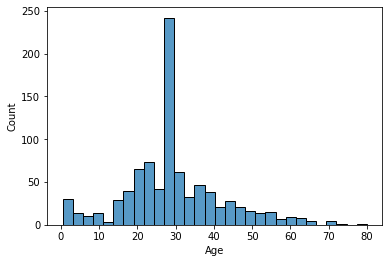

In [22]:
sns.histplot(df["Age"])

In [23]:
## Maximum travellers lies in the age group of 20-40 and majorily 28-30 yrs

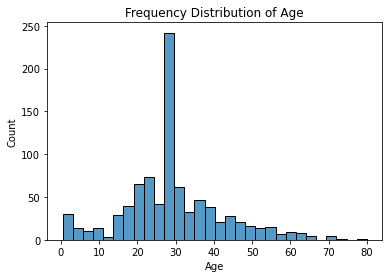

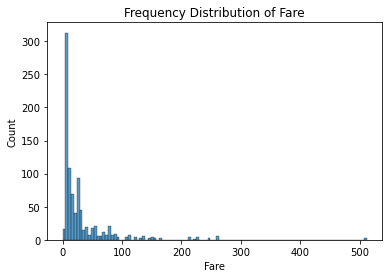

In [25]:
for i in cont_cols:
    sns.histplot(df[i])
    plt.title("Frequency Distribution of "+i)
    plt.show()

### Boxplot

#### It is used to see the quartile-wise distribution of a continuous variable
#### It is also used to see the outliers present in the data
#### It is used to see the quartile-wise distribution of a continuous variable against a categorical variable

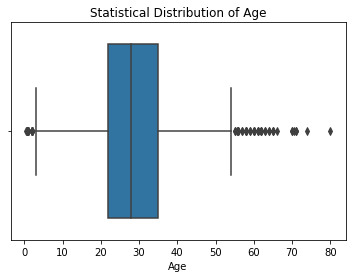

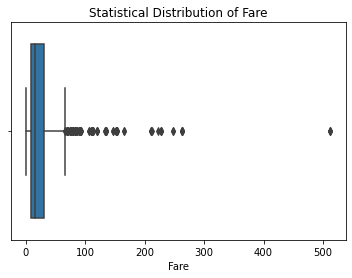

In [26]:
for i in cont_cols:
    sns.boxplot(df[i])
    plt.title("Statistical Distribution of "+i)
    plt.show()

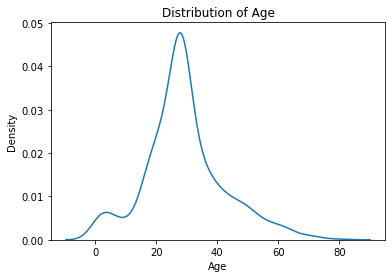

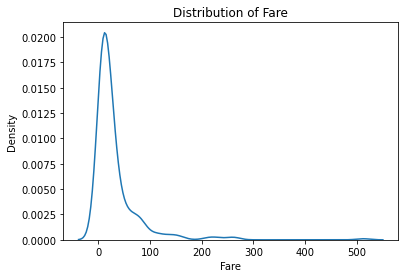

In [30]:
for i in cont_cols:
    sns.distplot(df[i],hist=False)
    plt.title("Distribution of "+i)
    plt.show()

## Pie Chart

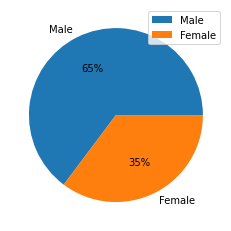

In [64]:
y=df["Sex"].value_counts(normalize=True).values
lab=["Male","Female"]
plt.pie(y,labels=lab,autopct='%0.0f%%')
plt.legend()
plt.show()

In [36]:
df["Sex"].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

## Bivariate Analysis

In [43]:
df["Survived"]=df["Survived"].map({0:"Non-Survived",1:"Survived"})

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

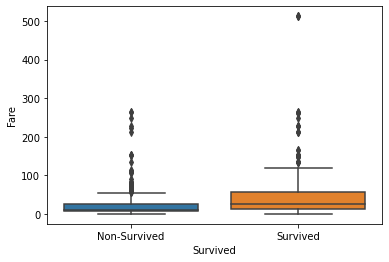

In [44]:
sns.boxplot(df["Survived"],df["Fare"])

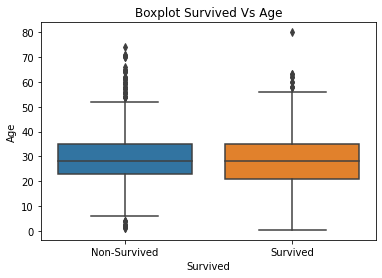

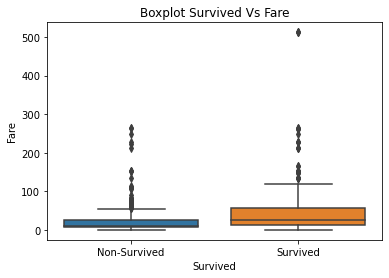

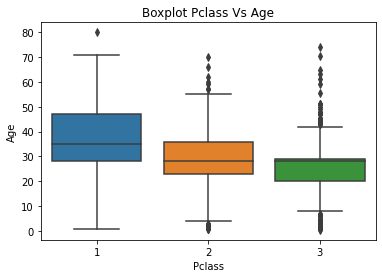

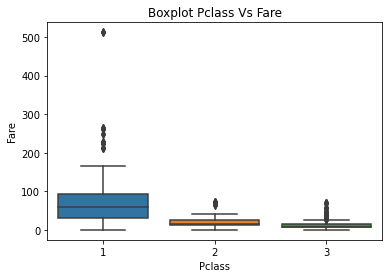

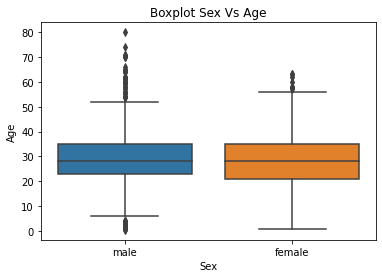

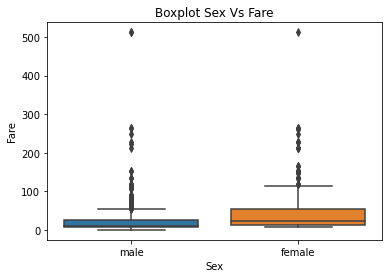

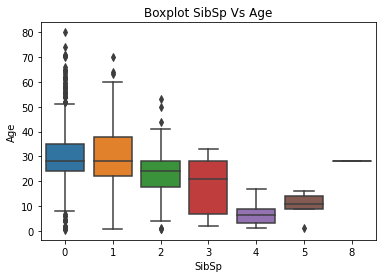

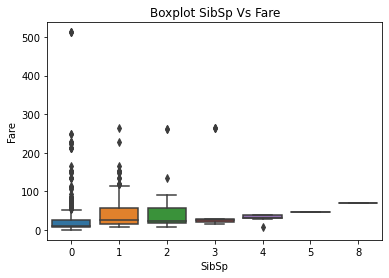

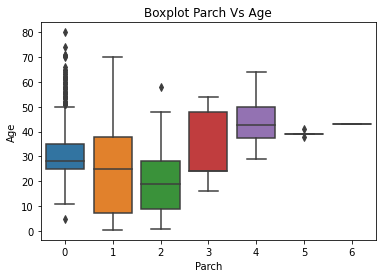

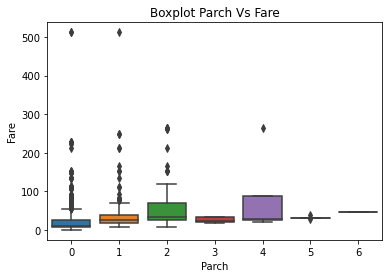

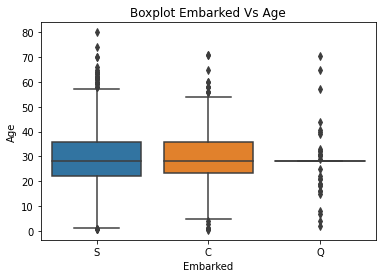

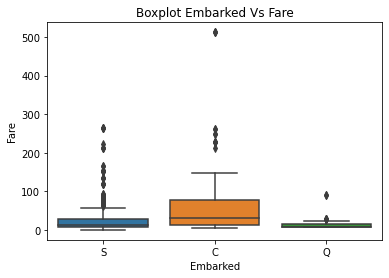

In [45]:
for i in cat_cols:
    for j in cont_cols:
        sns.boxplot(df[i],df[j])
        plt.title("Boxplot "+i+" Vs "+j)
        plt.show()

## ScatterPlot

#### It is used to see the relationship between two continuous varible

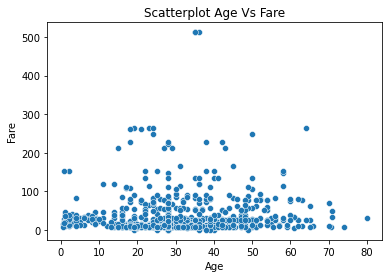

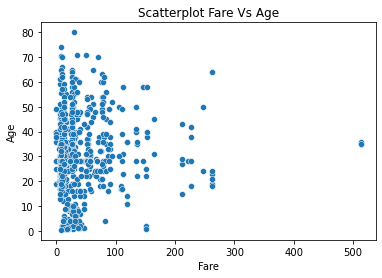

In [46]:
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            sns.scatterplot(df[i],df[j])
            plt.title("Scatterplot "+i+" Vs "+j)
            plt.show() 

## BarPlot

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

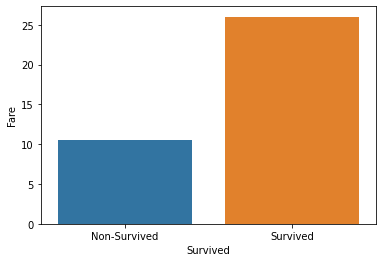

In [49]:
sns.barplot(df["Survived"],df["Fare"],ci=None,estimator=np.median)

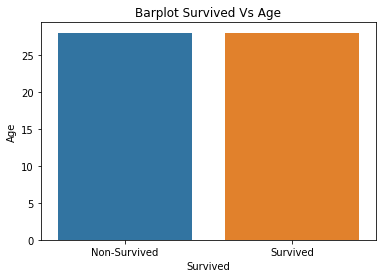

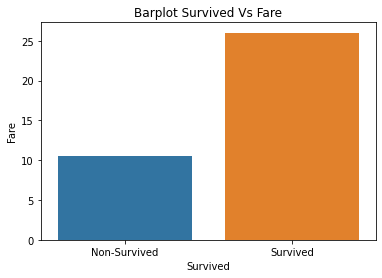

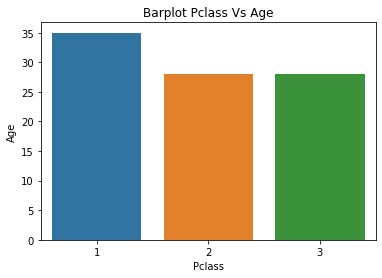

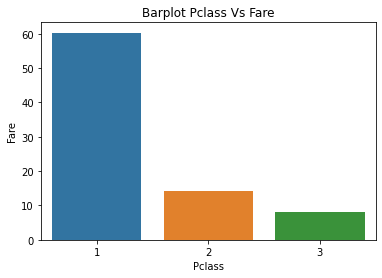

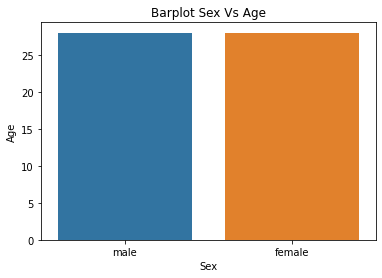

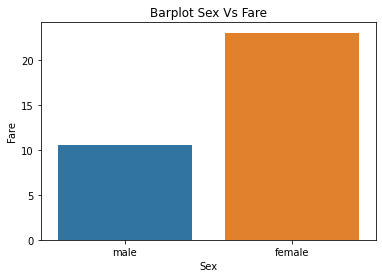

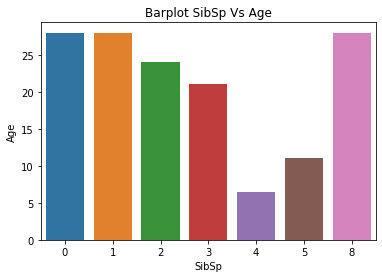

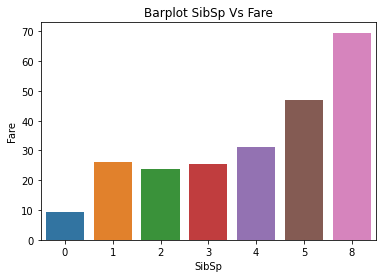

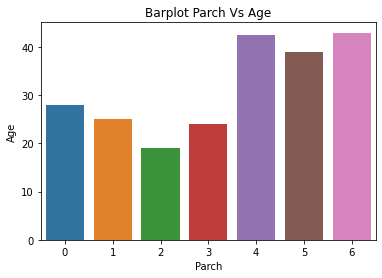

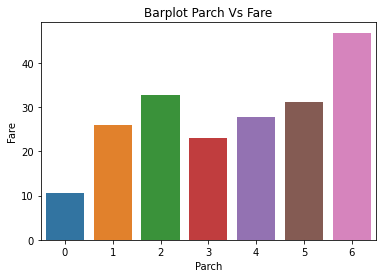

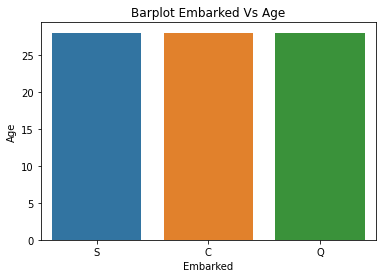

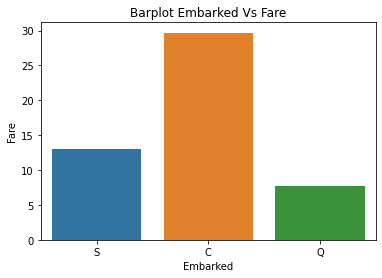

In [52]:
for i in cat_cols:
    for j in cont_cols:
        sns.barplot(df[i],df[j],ci=None,estimator=np.median)
        plt.title("Barplot "+i+" Vs "+j)
        plt.show()

## Multivariate Analysis

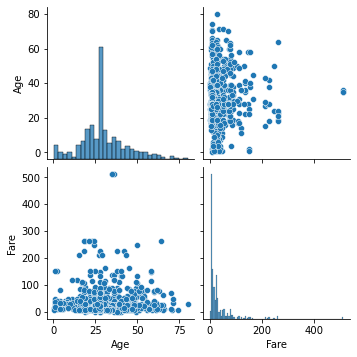

In [65]:
sns.pairplot(df[cont_cols])

<AxesSubplot:>

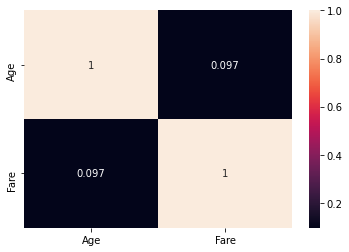

In [66]:
sns.heatmap(df[cont_cols].corr(),annot=True)

In [67]:
df[cont_cols].corr()

,Age,Fare
Age,1.000000,0.096688
Fare,0.096688,1.000000


In [ ]:
## Correlation Coefficient 
- Shows strength of the relationship
- -1 to 1 --> Range of Correlation Coefficient
- -1 to 0 (Negative Value)--> Negative Relationship (Inverse)
-  0 to 1 (Positive Value)--> Positive Relationship (Direct)
-  Closer to 0 means no relationship

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

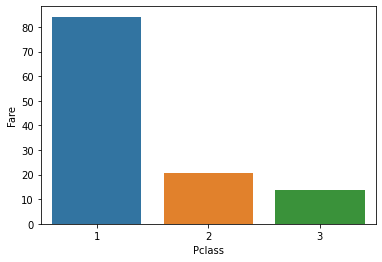

In [68]:
sns.barplot(df["Pclass"],df["Fare"],ci=None)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

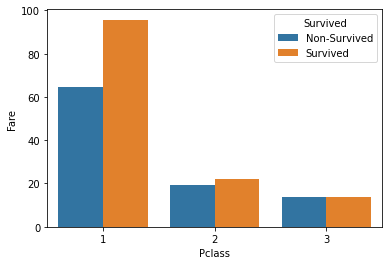

In [69]:
sns.barplot(df["Pclass"],df["Fare"],ci=None,hue=df["Survived"])

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

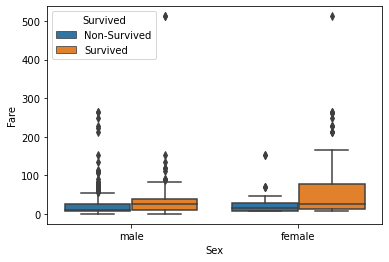

In [71]:
sns.boxplot(df["Sex"],df["Fare"],hue=df["Survived"])

### Problem Statement: Perform the EDA analysis on the given Linnerrud dataset and bring the insights using:
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis<br><br><br>

- Note: Use appropriate a figure size, labels and customizations

In [3]:
import pandas as pd
from sklearn.datasets import load_linnerud
import warnings
warnings.filterwarnings(action="ignore")
df=pd.read_csv("exercise.csv")
df.head()

,weight,waist,pulse,chins,sit_ups,jumps
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


## Univariate Analysis

#### Ques1. Write a python program to to create a frequency distribution plot of "weight" column from given data with bins as 10.

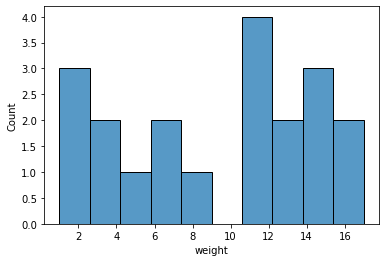

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["weight"],bins=10)
plt.show()

#### Ques2. Write a python program to perform a univariate analysis using statistical summary plot of "pulse" column from given data and check whether outliers are present or not.

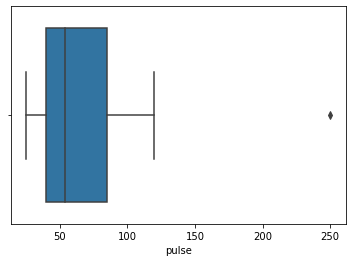

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df["pulse"])
plt.show()

### Bivariate Analysis 

#### Ques3. Using a appropriate graph, visualize the relationship between "waist" and "sit_ups" and identify whether these features are positively correlated, negatively correlated or not correlated.

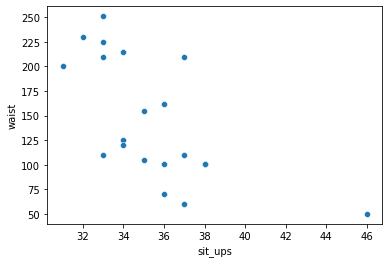

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(df["sit_ups"],df["waist"])
plt.show()

### Multivariate Analysis

#### Ques4. Perform the multivariate analysis using pairplot for the given dataset.

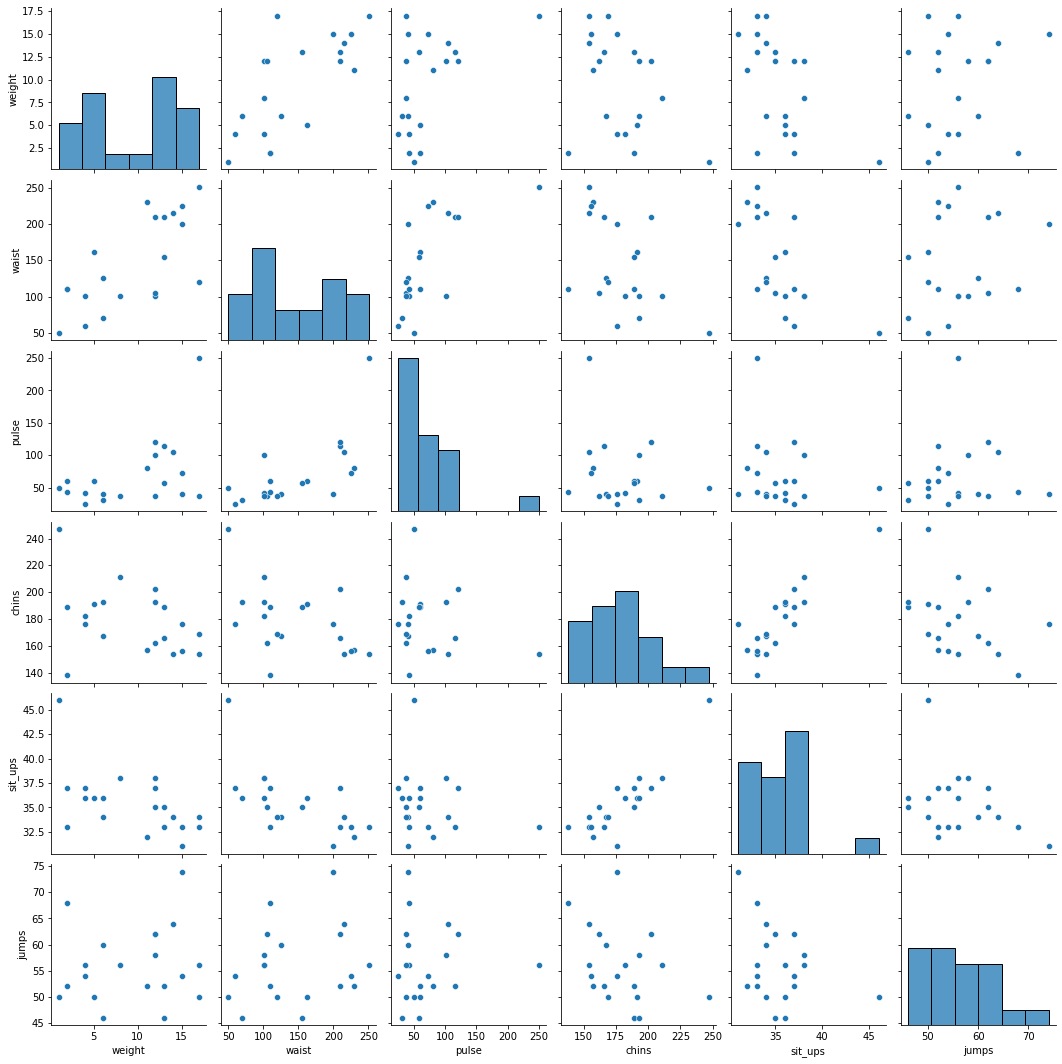

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df)
plt.show()

#### Ques5. Perform the multivariate analysis by checking the correlation matrix using heatmap for all the numerical features given dataset. Also annotate the values of correlation coefficient on the heatmap. Use appropriate figsize.

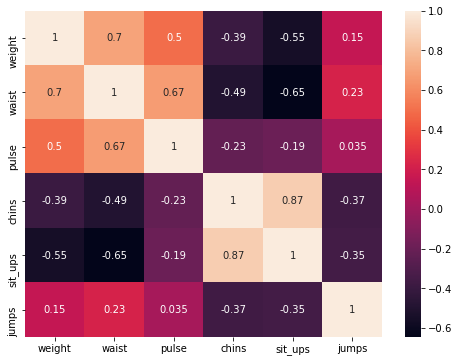

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()